# Study of ring systems in the dataset

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (400, 300)
IPythonConsole.drawOptions.addAtomIndices = True
import pandas as pd

In [2]:
drugs_db_route_merged = pd.read_csv('../data/approved_drugs_final_2022.csv')

In [3]:
# the cook book example
def GetRingSystems(mol, includeSpiro=False):
    ri = mol.GetRingInfo()
    systems = []
    for ring in ri.AtomRings():
        ringAts = set(ring)
        nSystems = []
        for system in systems:
            nInCommon = len(ringAts.intersection(system))
            if nInCommon and (includeSpiro or nInCommon>1):
                ringAts = ringAts.union(system)
            else:
                nSystems.append(system)
        nSystems.append(ringAts)
        systems = nSystems
    return [list(ring_idx) for ring_idx in systems] 

In [4]:
def rings_substructures(ringSys):
    rings_in_molecule = []
    for ring in ringSys:
        substructure_smiles = Chem.MolFragmentToSmiles(m, ring)
        rings_in_molecule.append(substructure_smiles)
    return (rings_in_molecule)

In [5]:
drugs_smiles_list = (list(drugs_db_route_merged.SMILES))
len(drugs_smiles_list)

563

In [43]:
test = drugs_smiles_list[0:100]
rings_in_drugs_list = []

for smiles in test:
    m = Chem.MolFromSmiles(smiles)
    ringSys = GetRingSystems(m)
    rings_in_molecule = rings_substructures(ringSys=ringSys)
    for ring_smiles in rings_in_molecule:
        rings_in_drugs_list.append(ring_smiles)

rings_in_drugs_list

['c1ccc2c(c1)CCCO2',
 'c1ccccc1',
 'C1CSCN1',
 'c1ccc2c(c1)ncc1ncnc12',
 'C1CN2Cc3ccccc3N=C2N1',
 'C1CC[C@@H]2CNCC[C@@H]2C1',
 'c1ccccc1',
 'c1ccccc1',
 'c1ccncc1',
 'C1CNCCN1',
 'c1ccc2[nH]ccc2c1',
 'c1ccccc1',
 'c1ccccc1',
 'c1ccccc1',
 'c1ccccc1',
 'c1ccccc1',
 'c1ccncc1',
 'c1ccc2c(c1)CCCS2',
 'c1ccncc1',
 'c1ccccc1',
 'c1nc2c(s1)CCCC2',
 'c1ccccc1',
 'c1ccccc1',
 'c1ccccc1',
 'c1ncnn1',
 'c1ccccc1',
 'c1ccc2[nH]ccc2c1',
 'C1CN2[C@@H]3CCC[C@H]2C[C@@H]1C3',
 'c1ccccc1',
 'c1ccccc1',
 'C1Cc2ccccc2N1',
 'c1ccccc1',
 'c1ccc2c(c1)CCNCC2',
 'C1CNCCN1',
 'C1=Nc2ccccc2Sc2ccccc21',
 'c1ccsc1',
 'C1CCCNC1',
 'c1ccsc1',
 'C1CN=CN1',
 'C1CCCC1',
 'c1ccccc1',
 'c1ccccc1',
 'c1nn[nH]n1',
 'C1CNCCN1',
 'c1ccc2ncccc2c1',
 'C1CC1',
 'c1cc2c(s1)CCNC2',
 'c1ccccc1',
 'C1CCC1',
 'c1ccccc1',
 'c1ccc2[nH]ccc2c1',
 'C1NCCO1',
 'c1ccncc1',
 'c1ccncc1',
 'C1C[C@H]2SCC=CN12',
 'c1cscn1',
 'c1cn[nH]c1',
 'c1ccccc1',
 'c1ccccc1',
 'C1CCNCC1',
 'c1ccc2sccc2c1',
 'C1NC[C@@H]2C[C@H]12',
 'c1cnc2ncccc2c1',
 'c1cc

In [44]:
# Converting the list to a dictionary
d = {}
for ring in rings_in_drugs_list:
    d[ring] = d.get(ring, 0) + 1

# Converting the dictionary to a pandas dataframe
rings_df = pd.DataFrame.from_dict(d, orient='index', columns=['number_of_appearance']).reset_index()
rings_df = rings_df.rename(columns={'index':'smiles'})
rings_df = rings_df.sort_values(by='number_of_appearance', ascending=False).reset_index(drop=True)
print(rings_df.shape)
rings_df

(87, 2)


,smiles,number_of_appearance
0,c1ccccc1,68
1,c1ccncc1,11
2,C1CCNCC1,6
3,C1CC1,6
4,C1CNCCN1,6
...,...,...
82,c1ccc2c(c1)COC2,1
83,c1cnoc1,1
84,C1Nc2ccccc2CO1,1
85,C1CO1,1


RDKit ERROR: [17:56:30] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: [17:56:30] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: [17:56:30] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: [17:56:30] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
RDKit ERROR: [17:56:30] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: [17:56:30] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 10 11 12
[17:56:30] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: [17:56:30] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: [17:56:30] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
/home/gustavo/miniconda3/envs/teachopencadd/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:241: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(
[17:56:30] Can't kekulize mol.  Unkekulized atoms: 0 1

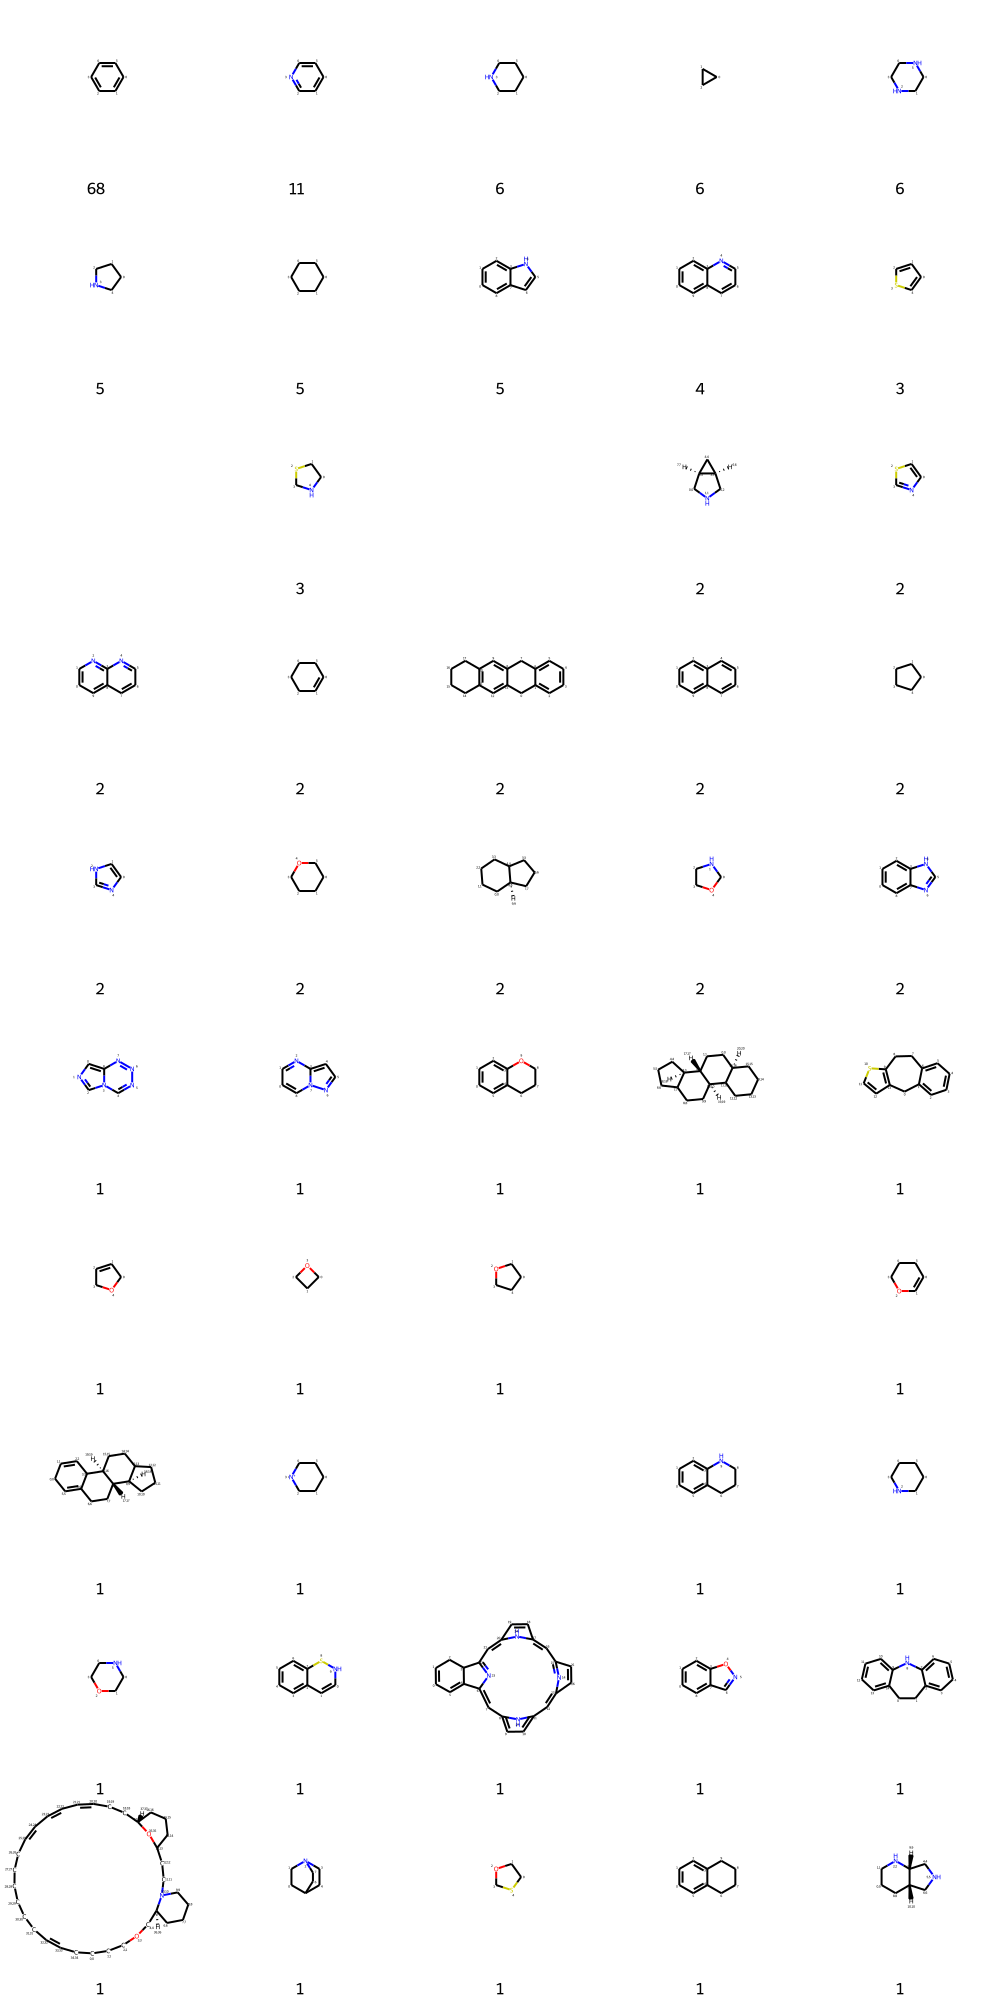

In [45]:
mol_list = [Chem.MolFromSmiles(smiles) for smiles in list(rings_df.smiles)]
legends = [str(value) for value in list(rings_df.number_of_appearance)]
Draw.MolsToGridImage(mol_list, legends=legends, molsPerRow=5)